In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier, CatBoostRegressor
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Setting styles
InteractiveShell.ast_node_interactivity = "all"
sns.set(style="whitegrid", color_codes=True, rc={"figure.figsize": (12.7, 9.27)})

random_state = 123


In [2]:

df = pd.read_csv(os.path.join("data", "processed", "train.csv"))
df = df.drop(columns=["train", "relativeposition", "spaceid"])

df_valid = pd.read_csv(os.path.join("data", "processed", "test.csv"))
df_valid = df_valid.drop(columns=["train", "relativeposition", "spaceid"])



In [3]:

X = df.drop(columns=["longitude", "latitude", "floor", "buildingid"])
y = pd.DataFrame(
    {
        "lon": df.longitude,
        "lat": df.latitude,
        "floor": df.floor,
        "building": df.buildingid,
    }
)

X_valid = df_valid.drop(columns=["longitude", "latitude", "floor", "buildingid"])
y_valid = pd.DataFrame(
    {
        "lon": df_valid.longitude,
        "lat": df_valid.latitude,
        "floor": df_valid.floor,
        "building": df_valid.buildingid,
    }
)


In [4]:

catboost_lon_level1 = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE", random_state=random_state
)

catboost_lat_level1 = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE", random_state=random_state
)

catboost_building_level1 = CatBoostClassifier(
    loss_function="MultiClass", eval_metric="MultiClass", random_state=random_state
)

catboost_floor_level1 = CatBoostClassifier(
    loss_function="MultiClass", eval_metric="MultiClass", random_state=random_state
)


In [5]:

catboost_lon_level1.fit(X, y.lon)


621:	learn: 13.3000770	total: 44.5s	remaining: 27s
622:	learn: 13.2940127	total: 44.5s	remaining: 26.9s
623:	learn: 13.2837060	total: 44.6s	remaining: 26.9s
624:	learn: 13.2749994	total: 44.7s	remaining: 26.8s
625:	learn: 13.2696630	total: 44.7s	remaining: 26.7s
626:	learn: 13.2686174	total: 44.8s	remaining: 26.6s
627:	learn: 13.2612817	total: 44.9s	remaining: 26.6s
628:	learn: 13.2553133	total: 44.9s	remaining: 26.5s
629:	learn: 13.2496422	total: 45s	remaining: 26.4s
630:	learn: 13.2431065	total: 45.1s	remaining: 26.3s
631:	learn: 13.2366627	total: 45.1s	remaining: 26.3s
632:	learn: 13.2299414	total: 45.2s	remaining: 26.2s
633:	learn: 13.2187033	total: 45.3s	remaining: 26.1s
634:	learn: 13.2130863	total: 45.3s	remaining: 26.1s
635:	learn: 13.2123875	total: 45.4s	remaining: 26s
636:	learn: 13.2051149	total: 45.5s	remaining: 25.9s
637:	learn: 13.1990352	total: 45.6s	remaining: 25.9s
638:	learn: 13.1984611	total: 45.6s	remaining: 25.8s
639:	learn: 13.1907960	total: 45.7s	remaining: 25.7s

In [6]:

catboost_lat_level1.fit(X, y.lat)


earn: 9.3628290	total: 48.6s	remaining: 30.3s
616:	learn: 9.3516320	total: 48.6s	remaining: 30.2s
617:	learn: 9.3477562	total: 48.7s	remaining: 30.1s
618:	learn: 9.3434375	total: 48.8s	remaining: 30.1s
619:	learn: 9.3378579	total: 48.9s	remaining: 30s
620:	learn: 9.3311106	total: 49.1s	remaining: 29.9s
621:	learn: 9.3243405	total: 49.2s	remaining: 29.9s
622:	learn: 9.3187158	total: 49.2s	remaining: 29.8s
623:	learn: 9.3147689	total: 49.3s	remaining: 29.7s
624:	learn: 9.3110827	total: 49.4s	remaining: 29.6s
625:	learn: 9.3056385	total: 49.5s	remaining: 29.6s
626:	learn: 9.3016956	total: 49.6s	remaining: 29.5s
627:	learn: 9.2969235	total: 49.7s	remaining: 29.4s
628:	learn: 9.2912730	total: 49.7s	remaining: 29.3s
629:	learn: 9.2845807	total: 49.8s	remaining: 29.3s
630:	learn: 9.2814443	total: 49.9s	remaining: 29.2s
631:	learn: 9.2801022	total: 50s	remaining: 29.1s
632:	learn: 9.2745638	total: 50s	remaining: 29s
633:	learn: 9.2713666	total: 50.1s	remaining: 28.9s
634:	learn: 9.2666082	tota

In [7]:

catboost_building_level1.fit(X, y.building)


.0110299	total: 1m 32s	remaining: 56.7s
620:	learn: 0.0110279	total: 1m 32s	remaining: 56.6s
621:	learn: 0.0110103	total: 1m 32s	remaining: 56.4s
622:	learn: 0.0109925	total: 1m 32s	remaining: 56.3s
623:	learn: 0.0109704	total: 1m 33s	remaining: 56.1s
624:	learn: 0.0109541	total: 1m 33s	remaining: 56s
625:	learn: 0.0109448	total: 1m 33s	remaining: 55.9s
626:	learn: 0.0109231	total: 1m 33s	remaining: 55.7s
627:	learn: 0.0109096	total: 1m 33s	remaining: 55.6s
628:	learn: 0.0108935	total: 1m 33s	remaining: 55.4s
629:	learn: 0.0108616	total: 1m 34s	remaining: 55.3s
630:	learn: 0.0108436	total: 1m 34s	remaining: 55.1s
631:	learn: 0.0108165	total: 1m 34s	remaining: 55s
632:	learn: 0.0107951	total: 1m 34s	remaining: 54.9s
633:	learn: 0.0107799	total: 1m 34s	remaining: 54.7s
634:	learn: 0.0107752	total: 1m 34s	remaining: 54.6s
635:	learn: 0.0107621	total: 1m 35s	remaining: 54.4s
636:	learn: 0.0107490	total: 1m 35s	remaining: 54.3s
637:	learn: 0.0107322	total: 1m 35s	remaining: 54.2s
638:	learn

In [8]:

catboost_floor_level1.fit(X, y.floor)


 8s	remaining: 1m 18s
621:	learn: 0.1872619	total: 2m 8s	remaining: 1m 18s
622:	learn: 0.1868983	total: 2m 8s	remaining: 1m 17s
623:	learn: 0.1865328	total: 2m 8s	remaining: 1m 17s
624:	learn: 0.1861667	total: 2m 9s	remaining: 1m 17s
625:	learn: 0.1859186	total: 2m 9s	remaining: 1m 17s
626:	learn: 0.1855867	total: 2m 9s	remaining: 1m 16s
627:	learn: 0.1852083	total: 2m 9s	remaining: 1m 16s
628:	learn: 0.1849526	total: 2m 9s	remaining: 1m 16s
629:	learn: 0.1846272	total: 2m 9s	remaining: 1m 16s
630:	learn: 0.1843333	total: 2m 10s	remaining: 1m 16s
631:	learn: 0.1840996	total: 2m 10s	remaining: 1m 15s
632:	learn: 0.1836055	total: 2m 10s	remaining: 1m 15s
633:	learn: 0.1833033	total: 2m 10s	remaining: 1m 15s
634:	learn: 0.1830395	total: 2m 10s	remaining: 1m 15s
635:	learn: 0.1827500	total: 2m 11s	remaining: 1m 14s
636:	learn: 0.1822417	total: 2m 11s	remaining: 1m 14s
637:	learn: 0.1819733	total: 2m 11s	remaining: 1m 14s
638:	learn: 0.1815825	total: 2m 11s	remaining: 1m 14s
639:	learn: 0.1

In [9]:

pred_lon = catboost_lon_level1.predict(X)
pred_lat = catboost_lat_level1.predict(X)
pred_buildings = catboost_building_level1.predict_proba(X)
pred_floors = catboost_floor_level1.predict_proba(X)

# untangling predictions for different classes

# not sure which predictions refers to which building and floor
pred_building0 = pred_buildings[:, 0]
pred_building1 = pred_buildings[:, 1]
pred_building2 = pred_buildings[:, 2]
pred_floor0 = pred_floors[:, 0]
pred_floor1 = pred_floors[:, 1]
pred_floor2 = pred_floors[:, 2]
pred_floor3 = pred_floors[:, 3]
pred_floor4 = pred_floors[:, 4]


pred_valid_lon = catboost_lon_level1.predict(X_valid)
pred_valid_lat = catboost_lat_level1.predict(X_valid)
pred_valid_buildings = catboost_building_level1.predict_proba(X_valid)
pred_valid_floors = catboost_floor_level1.predict_proba(X_valid)

# untangling predictions for different classes

# not sure which predictions refers to which building and floor
pred_valid_building0 = pred_valid_buildings[:, 0]
pred_valid_building1 = pred_valid_buildings[:, 1]
pred_valid_building2 = pred_valid_buildings[:, 2]
pred_valid_floor0 = pred_valid_floors[:, 0]
pred_valid_floor1 = pred_valid_floors[:, 1]
pred_valid_floor2 = pred_valid_floors[:, 2]
pred_valid_floor3 = pred_valid_floors[:, 3]
pred_valid_floor4 = pred_valid_floors[:, 4]


In [10]:

X_comb = pd.DataFrame(
    {
        "lon": pred_lon,
        "lat": pred_lat,
        "building0": pred_building0,
        "building1": pred_building1,
        "building2": pred_building2,
        "floor0": pred_floor0,
        "floor1": pred_floor1,
        "floor2": pred_floor2,
        "floor3": pred_floor3,
        "floor4": pred_floor4,
    }
)

# giving the second level models the predictions of other models
X_lon = pd.concat([X, X_comb], axis="columns").drop(columns=["lon"])
X_lat = pd.concat([X, X_comb], axis="columns").drop(columns=["lat"])
X_building = pd.concat([X, X_comb], axis="columns").drop(
    columns=["building0", "building1", "building2"]
)
X_floor = pd.concat([X, X_comb], axis="columns").drop(
    columns=["floor0", "floor1", "floor2", "floor3", "floor4"]
)

X_valid_comb = pd.DataFrame(
    {
        "lon": pred_valid_lon,
        "lat": pred_valid_lat,
        "building0": pred_valid_building0,
        "building1": pred_valid_building1,
        "building2": pred_valid_building2,
        "floor0": pred_valid_floor0,
        "floor1": pred_valid_floor1,
        "floor2": pred_valid_floor2,
        "floor3": pred_valid_floor3,
        "floor4": pred_valid_floor4,
    }
)

# giving the second level models the predictions of other models
X_valid_lon = pd.concat([X_valid, X_valid_comb], axis="columns").drop(columns=["lon"])
X_valid_lat = pd.concat([X_valid, X_valid_comb], axis="columns").drop(columns=["lat"])
X_valid_building = pd.concat([X_valid, X_valid_comb], axis="columns").drop(
    columns=["building0", "building1", "building2"]
)
X_valid_floor = pd.concat([X_valid, X_valid_comb], axis="columns").drop(
    columns=["floor0", "floor1", "floor2", "floor3", "floor4"]
)


In [11]:

catboost_lon_level2 = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE", random_state=random_state
)

catboost_lat_level2 = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE", random_state=random_state
)

catboost_building_level2 = CatBoostClassifier(
    loss_function="MultiClass", eval_metric="MultiClass", random_state=random_state
)

catboost_floor_level2 = CatBoostClassifier(
    loss_function="MultiClass", eval_metric="MultiClass", random_state=random_state
)


In [12]:

catboost_lon_level2.fit(X_lon, y.lon)


58803	total: 50.3s	remaining: 31.3s
616:	learn: 9.8192612	total: 50.3s	remaining: 31.2s
617:	learn: 9.8126046	total: 50.4s	remaining: 31.2s
618:	learn: 9.8102768	total: 50.5s	remaining: 31.1s
619:	learn: 9.8060595	total: 50.5s	remaining: 31s
620:	learn: 9.8033382	total: 50.6s	remaining: 30.9s
621:	learn: 9.7988836	total: 50.7s	remaining: 30.8s
622:	learn: 9.7960672	total: 50.8s	remaining: 30.7s
623:	learn: 9.7888321	total: 50.8s	remaining: 30.6s
624:	learn: 9.7852230	total: 50.9s	remaining: 30.5s
625:	learn: 9.7799256	total: 51s	remaining: 30.5s
626:	learn: 9.7773963	total: 51.1s	remaining: 30.4s
627:	learn: 9.7734391	total: 51.1s	remaining: 30.3s
628:	learn: 9.7674927	total: 51.2s	remaining: 30.2s
629:	learn: 9.7625731	total: 51.3s	remaining: 30.1s
630:	learn: 9.7549407	total: 51.4s	remaining: 30s
631:	learn: 9.7493462	total: 51.5s	remaining: 30s
632:	learn: 9.7456615	total: 51.6s	remaining: 29.9s
633:	learn: 9.7434575	total: 51.7s	remaining: 29.8s
634:	learn: 9.7414362	total: 51.8s	r

In [13]:

catboost_lat_level2.fit(X_lat, y.lat)


7.6433009	total: 47.7s	remaining: 30s
614:	learn: 7.6398144	total: 47.7s	remaining: 29.9s
615:	learn: 7.6343493	total: 47.8s	remaining: 29.8s
616:	learn: 7.6316475	total: 47.8s	remaining: 29.7s
617:	learn: 7.6274286	total: 47.9s	remaining: 29.6s
618:	learn: 7.6240378	total: 48s	remaining: 29.5s
619:	learn: 7.6193487	total: 48s	remaining: 29.4s
620:	learn: 7.6142492	total: 48.1s	remaining: 29.3s
621:	learn: 7.6101001	total: 48.1s	remaining: 29.3s
622:	learn: 7.6051488	total: 48.2s	remaining: 29.2s
623:	learn: 7.5971621	total: 48.3s	remaining: 29.1s
624:	learn: 7.5933451	total: 48.3s	remaining: 29s
625:	learn: 7.5880611	total: 48.4s	remaining: 28.9s
626:	learn: 7.5845148	total: 48.4s	remaining: 28.8s
627:	learn: 7.5818035	total: 48.5s	remaining: 28.7s
628:	learn: 7.5787266	total: 48.5s	remaining: 28.6s
629:	learn: 7.5756736	total: 48.6s	remaining: 28.5s
630:	learn: 7.5719472	total: 48.6s	remaining: 28.4s
631:	learn: 7.5690160	total: 48.7s	remaining: 28.3s
632:	learn: 7.5629349	total: 48.

In [14]:

catboost_building_level2.fit(X_building, y.building)


s	remaining: 51s
620:	learn: 0.0052608	total: 1m 23s	remaining: 50.9s
621:	learn: 0.0052541	total: 1m 23s	remaining: 50.7s
622:	learn: 0.0052421	total: 1m 23s	remaining: 50.6s
623:	learn: 0.0052302	total: 1m 23s	remaining: 50.4s
624:	learn: 0.0052246	total: 1m 23s	remaining: 50.3s
625:	learn: 0.0052221	total: 1m 23s	remaining: 50.2s
626:	learn: 0.0052191	total: 1m 24s	remaining: 50.1s
627:	learn: 0.0052156	total: 1m 24s	remaining: 49.9s
628:	learn: 0.0052114	total: 1m 24s	remaining: 49.8s
629:	learn: 0.0052077	total: 1m 24s	remaining: 49.7s
630:	learn: 0.0052076	total: 1m 24s	remaining: 49.5s
631:	learn: 0.0051989	total: 1m 24s	remaining: 49.4s
632:	learn: 0.0051924	total: 1m 24s	remaining: 49.2s
633:	learn: 0.0051879	total: 1m 24s	remaining: 49.1s
634:	learn: 0.0051846	total: 1m 25s	remaining: 48.9s
635:	learn: 0.0051834	total: 1m 25s	remaining: 48.8s
636:	learn: 0.0051750	total: 1m 25s	remaining: 48.6s
637:	learn: 0.0051688	total: 1m 25s	remaining: 48.5s
638:	learn: 0.0051654	total: 

In [15]:

catboost_floor_level2.fit(X_floor, y.floor)



ining: 1m 7s
620:	learn: 0.1866905	total: 1m 50s	remaining: 1m 7s
621:	learn: 0.1864138	total: 1m 50s	remaining: 1m 7s
622:	learn: 0.1860111	total: 1m 50s	remaining: 1m 6s
623:	learn: 0.1856150	total: 1m 50s	remaining: 1m 6s
624:	learn: 0.1852365	total: 1m 50s	remaining: 1m 6s
625:	learn: 0.1847616	total: 1m 51s	remaining: 1m 6s
626:	learn: 0.1843301	total: 1m 51s	remaining: 1m 6s
627:	learn: 0.1838693	total: 1m 51s	remaining: 1m 6s
628:	learn: 0.1837090	total: 1m 51s	remaining: 1m 5s
629:	learn: 0.1834246	total: 1m 51s	remaining: 1m 5s
630:	learn: 0.1831590	total: 1m 51s	remaining: 1m 5s
631:	learn: 0.1827353	total: 1m 52s	remaining: 1m 5s
632:	learn: 0.1824450	total: 1m 52s	remaining: 1m 5s
633:	learn: 0.1818459	total: 1m 52s	remaining: 1m 4s
634:	learn: 0.1815720	total: 1m 52s	remaining: 1m 4s
635:	learn: 0.1812685	total: 1m 52s	remaining: 1m 4s
636:	learn: 0.1808833	total: 1m 52s	remaining: 1m 4s
637:	learn: 0.1804333	total: 1m 53s	remaining: 1m 4s
638:	learn: 0.1801206	total: 1m 5

In [16]:

pred_lon = catboost_lon_level2.predict(X_lon)
pred_lat = catboost_lat_level2.predict(X_lat)
pred_buildings = catboost_building_level2.predict_proba(X_building)
pred_floors = catboost_floor_level2.predict_proba(X_floor)

# untangling predictions for different classes

# not sure which predictions refers to which building and floor
pred_building0 = pred_buildings[:, 0]
pred_building1 = pred_buildings[:, 1]
pred_building2 = pred_buildings[:, 2]
pred_floor0 = pred_floors[:, 0]
pred_floor1 = pred_floors[:, 1]
pred_floor2 = pred_floors[:, 2]
pred_floor3 = pred_floors[:, 3]
pred_floor4 = pred_floors[:, 4]

pred_valid_lon = catboost_lon_level2.predict(X_valid_lon)
pred_valid_lat = catboost_lat_level2.predict(X_valid_lat)
pred_valid_buildings = catboost_building_level2.predict_proba(X_valid_building)
pred_valid_floors = catboost_floor_level2.predict_proba(X_valid_floor)

# untangling predictions for different classes

# not sure which predictions refers to which building and floor
pred_valid_building0 = pred_valid_buildings[:, 0]
pred_valid_building1 = pred_valid_buildings[:, 1]
pred_valid_building2 = pred_valid_buildings[:, 2]
pred_valid_floor0 = pred_valid_floors[:, 0]
pred_valid_floor1 = pred_valid_floors[:, 1]
pred_valid_floor2 = pred_valid_floors[:, 2]
pred_valid_floor3 = pred_valid_floors[:, 3]
pred_valid_floor4 = pred_valid_floors[:, 4]



In [17]:

X_comb = pd.DataFrame(
    {
        "lon": pred_lon,
        "lat": pred_lat,
        "building0": pred_building0,
        "building1": pred_building1,
        "building2": pred_building2,
        "floor0": pred_floor0,
        "floor1": pred_floor1,
        "floor2": pred_floor2,
        "floor3": pred_floor3,
        "floor4": pred_floor4,
    }
)

X_valid_comb = pd.DataFrame(
    {
        "lon": pred_valid_lon,
        "lat": pred_valid_lat,
        "building0": pred_valid_building0,
        "building1": pred_valid_building1,
        "building2": pred_valid_building2,
        "floor0": pred_valid_floor0,
        "floor1": pred_valid_floor1,
        "floor2": pred_valid_floor2,
        "floor3": pred_valid_floor3,
        "floor4": pred_valid_floor4,
    }
)


In [18]:

catboost_lon_comb = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE", random_state=random_state
)

catboost_lat_comb = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE", random_state=random_state
)

catboost_floor_comb = CatBoostClassifier(
    loss_function="MultiClass", eval_metric="MultiClass", random_state=random_state
)

catboost_building_comb = CatBoostClassifier(
    loss_function="MultiClass", eval_metric="MultiClass", random_state=random_state
)


In [19]:

catboost_lon_comb.fit(X_comb, y.lon)


613:	learn: 7.7995021	total: 19.1s	remaining: 12s
614:	learn: 7.7990070	total: 19.2s	remaining: 12s
615:	learn: 7.7983630	total: 19.2s	remaining: 12s
616:	learn: 7.7978305	total: 19.2s	remaining: 11.9s
617:	learn: 7.7968244	total: 19.3s	remaining: 11.9s
618:	learn: 7.7960312	total: 19.3s	remaining: 11.9s
619:	learn: 7.7955360	total: 19.3s	remaining: 11.8s
620:	learn: 7.7947801	total: 19.3s	remaining: 11.8s
621:	learn: 7.7936751	total: 19.4s	remaining: 11.8s
622:	learn: 7.7932958	total: 19.4s	remaining: 11.7s
623:	learn: 7.7926560	total: 19.4s	remaining: 11.7s
624:	learn: 7.7918064	total: 19.5s	remaining: 11.7s
625:	learn: 7.7911616	total: 19.5s	remaining: 11.7s
626:	learn: 7.7903470	total: 19.5s	remaining: 11.6s
627:	learn: 7.7897721	total: 19.6s	remaining: 11.6s
628:	learn: 7.7890450	total: 19.6s	remaining: 11.6s
629:	learn: 7.7883676	total: 19.6s	remaining: 11.5s
630:	learn: 7.7870976	total: 19.6s	remaining: 11.5s
631:	learn: 7.7863298	total: 19.7s	remaining: 11.5s
632:	learn: 7.7855

In [20]:

catboost_lat_comb.fit(X_comb, y.lat)


13:	learn: 5.8489950	total: 21.3s	remaining: 13.4s
614:	learn: 5.8481722	total: 21.3s	remaining: 13.4s
615:	learn: 5.8473961	total: 21.4s	remaining: 13.3s
616:	learn: 5.8463810	total: 21.4s	remaining: 13.3s
617:	learn: 5.8457365	total: 21.5s	remaining: 13.3s
618:	learn: 5.8450356	total: 21.5s	remaining: 13.2s
619:	learn: 5.8442681	total: 21.5s	remaining: 13.2s
620:	learn: 5.8432678	total: 21.6s	remaining: 13.2s
621:	learn: 5.8423038	total: 21.6s	remaining: 13.1s
622:	learn: 5.8413334	total: 21.6s	remaining: 13.1s
623:	learn: 5.8407196	total: 21.7s	remaining: 13.1s
624:	learn: 5.8394710	total: 21.7s	remaining: 13s
625:	learn: 5.8383157	total: 21.7s	remaining: 13s
626:	learn: 5.8373706	total: 21.8s	remaining: 13s
627:	learn: 5.8366270	total: 21.8s	remaining: 12.9s
628:	learn: 5.8360206	total: 21.8s	remaining: 12.9s
629:	learn: 5.8351866	total: 21.9s	remaining: 12.8s
630:	learn: 5.8344619	total: 21.9s	remaining: 12.8s
631:	learn: 5.8332970	total: 22s	remaining: 12.8s
632:	learn: 5.8325765

In [21]:

catboost_floor_comb.fit(X_comb, y.floor)


rn: 0.0061280	total: 48.7s	remaining: 30.7s
613:	learn: 0.0061231	total: 48.7s	remaining: 30.6s
614:	learn: 0.0061194	total: 48.8s	remaining: 30.5s
615:	learn: 0.0061160	total: 48.8s	remaining: 30.4s
616:	learn: 0.0061086	total: 48.9s	remaining: 30.4s
617:	learn: 0.0061033	total: 49s	remaining: 30.3s
618:	learn: 0.0060957	total: 49s	remaining: 30.2s
619:	learn: 0.0060912	total: 49.1s	remaining: 30.1s
620:	learn: 0.0060877	total: 49.1s	remaining: 30s
621:	learn: 0.0060799	total: 49.2s	remaining: 29.9s
622:	learn: 0.0060769	total: 49.2s	remaining: 29.8s
623:	learn: 0.0060716	total: 49.3s	remaining: 29.7s
624:	learn: 0.0060656	total: 49.3s	remaining: 29.6s
625:	learn: 0.0060606	total: 49.4s	remaining: 29.5s
626:	learn: 0.0060566	total: 49.4s	remaining: 29.4s
627:	learn: 0.0060515	total: 49.5s	remaining: 29.3s
628:	learn: 0.0060490	total: 49.5s	remaining: 29.2s
629:	learn: 0.0060447	total: 49.6s	remaining: 29.1s
630:	learn: 0.0060426	total: 49.6s	remaining: 29s
631:	learn: 0.0060374	total:

In [22]:

catboost_building_comb.fit(X_comb, y.building)


maining: 17.5s
613:	learn: 0.0029625	total: 27.7s	remaining: 17.4s
614:	learn: 0.0029621	total: 27.8s	remaining: 17.4s
615:	learn: 0.0029617	total: 27.8s	remaining: 17.3s
616:	learn: 0.0029613	total: 27.8s	remaining: 17.3s
617:	learn: 0.0029609	total: 27.9s	remaining: 17.2s
618:	learn: 0.0029606	total: 27.9s	remaining: 17.2s
619:	learn: 0.0029602	total: 27.9s	remaining: 17.1s
620:	learn: 0.0029598	total: 28s	remaining: 17.1s
621:	learn: 0.0029594	total: 28s	remaining: 17s
622:	learn: 0.0029591	total: 28s	remaining: 17s
623:	learn: 0.0029587	total: 28s	remaining: 16.9s
624:	learn: 0.0029584	total: 28.1s	remaining: 16.8s
625:	learn: 0.0029580	total: 28.1s	remaining: 16.8s
626:	learn: 0.0029576	total: 28.1s	remaining: 16.7s
627:	learn: 0.0029572	total: 28.2s	remaining: 16.7s
628:	learn: 0.0029569	total: 28.2s	remaining: 16.6s
629:	learn: 0.0029565	total: 28.2s	remaining: 16.6s
630:	learn: 0.0029562	total: 28.3s	remaining: 16.5s
631:	learn: 0.0029558	total: 28.4s	remaining: 16.5s
632:	lear

In [23]:

pred_lon = catboost_lon_comb.predict(X_valid_comb)
pred_lat = catboost_lat_comb.predict(X_valid_comb)
pred_floor = np.hstack(catboost_floor_comb.predict(X_valid_comb))
pred_building = np.hstack(catboost_building_comb.predict(X_valid_comb))

distance = (
    np.absolute(pred_lon - y_valid.lon)
    + np.absolute(pred_lat - y_valid.lat)
    + 4 * np.absolute(pred_floor - y_valid.floor)
    + 50 * np.absolute(pred_building - y_valid.building)
)

score = np.mean(distance)
lon_score = np.mean(np.absolute(pred_lon - y_valid.lon))
lat_score = np.mean(np.absolute(pred_lat - y_valid.lat))
right_floor = np.round(np.mean(pred_floor == y_valid.floor) * 100, 2)
right_building = np.round(np.mean(pred_building == y_valid.building) * 100, 2)

predictions = pd.DataFrame(
    {
        "LATITUDE": pred_lat,
        "LONGITUDE": pred_lon,
        "FLOOR": pred_floor,
        "distance": distance,
    }
)

true_values = pd.DataFrame(
    {
        "LATITUDE": y_valid.lat,
        "LONGITUDE": y_valid.lon,
        "FLOOR": y_valid.floor,
        "distance": distance,
    }
)



Mean error in distance75: 17.998900216550165
Latitude error: 7.319795643896515
Longitude error: 8.923929055101896
Floors correct: 90.1 %
Building correct: 97.39 %


Text(0.5, 1.0, 'Predictions Floor 0')

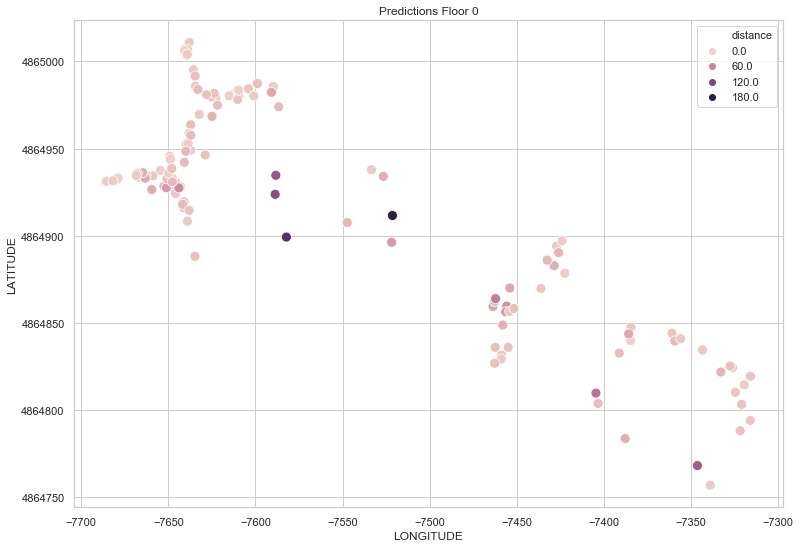

Text(0.5, 1.0, 'Real Values Floor 0')

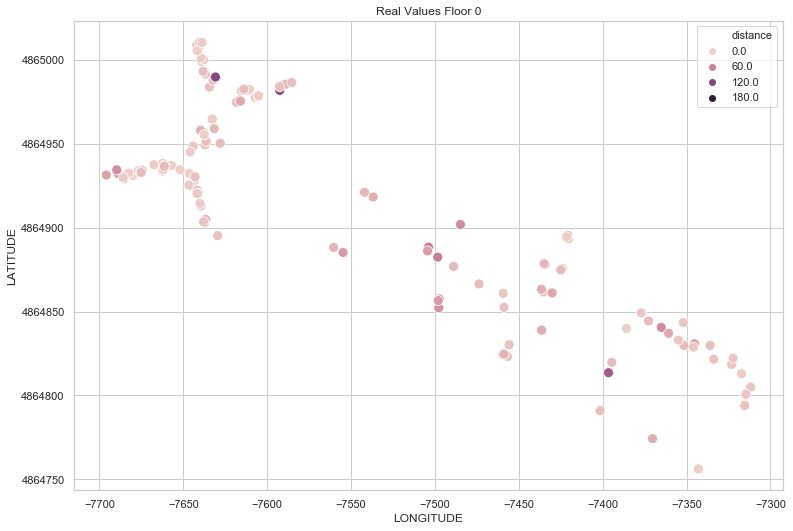

Text(0.5, 1.0, 'Predictions Floor 1')

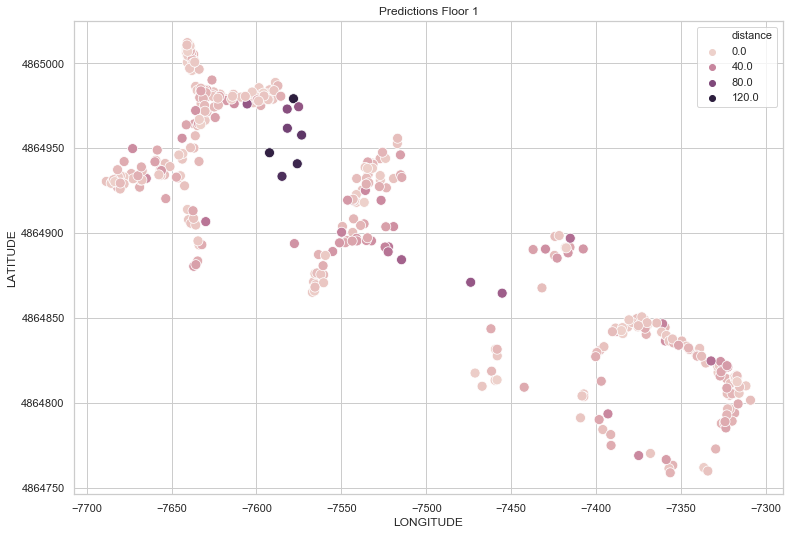

Text(0.5, 1.0, 'Real Values Floor 1')

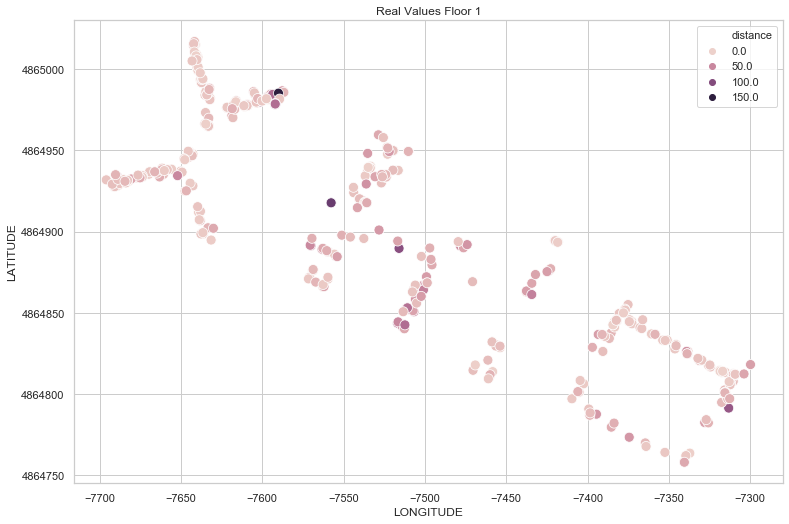

Text(0.5, 1.0, 'Predictions Floor 2')

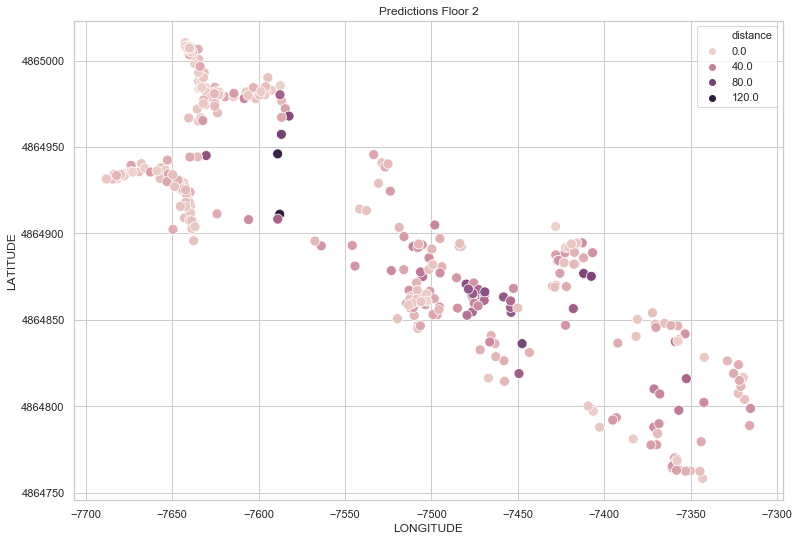

Text(0.5, 1.0, 'Real Values Floor 2')

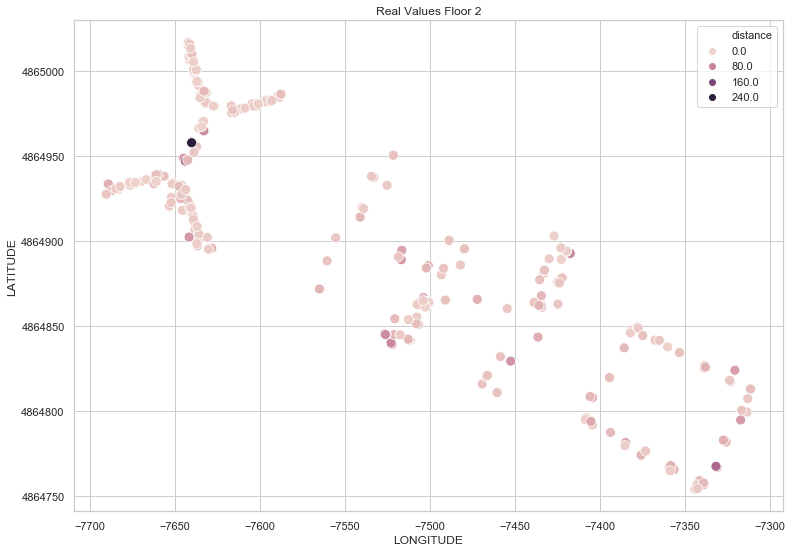

Text(0.5, 1.0, 'Predictions Floor 3')

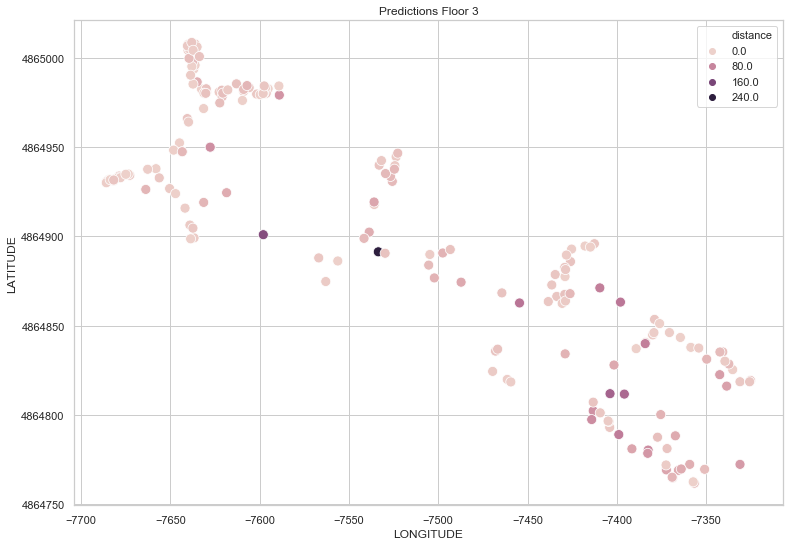

Text(0.5, 1.0, 'Real Values Floor 3')

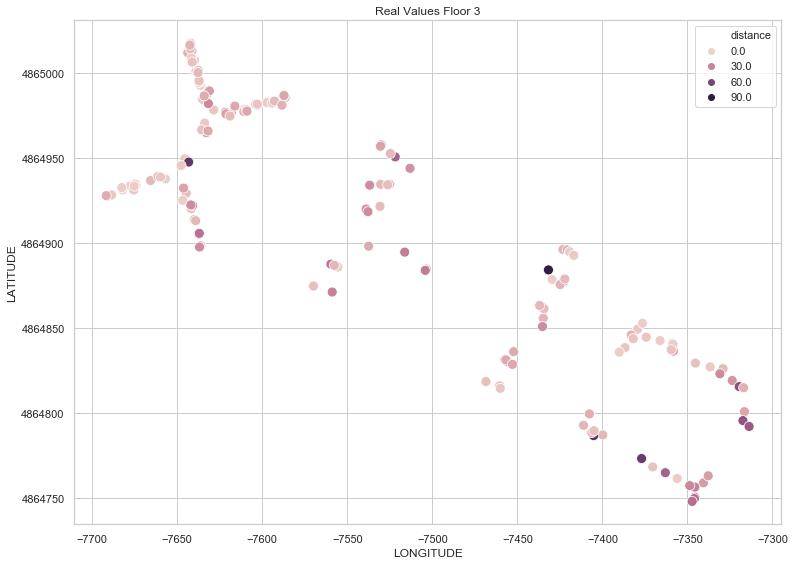

Text(0.5, 1.0, 'Predictions Floor 4')

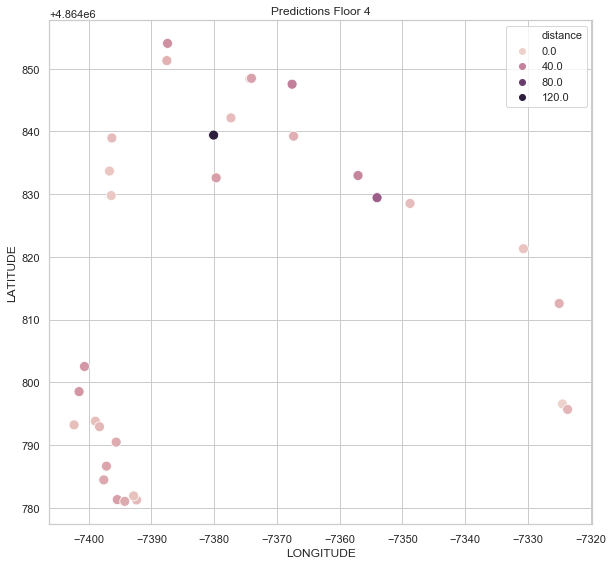

Text(0.5, 1.0, 'Real Values Floor 4')

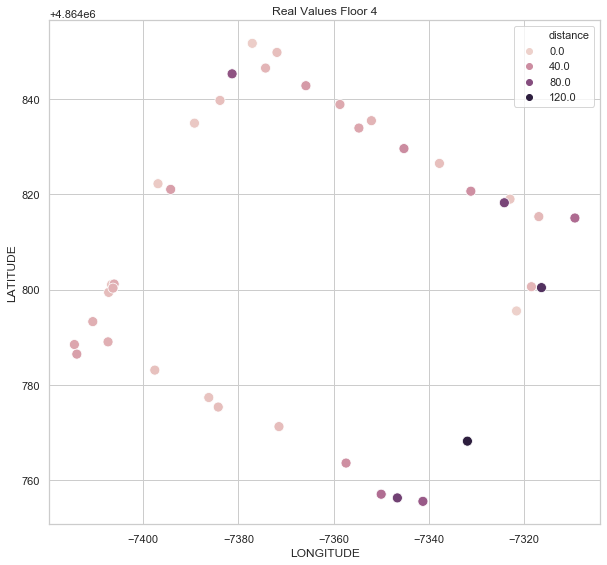

In [24]:

print(f"Mean error in distance75: {score}")
print(f"Latitude error: {lat_score}")
print(f"Longitude error: {lon_score}")
print(f"Floors correct: {right_floor} %")
print(f"Building correct: {right_building} %")

for floor in sorted(predictions.FLOOR.unique()):
    fig, ax = plt.subplots()
    sns.scatterplot(
        x="LONGITUDE",
        y="LATITUDE",
        hue="distance",
        ax=ax,
        s=100,
        data=predictions[predictions["FLOOR"] == int(floor)],
    )
    ax.set_aspect(aspect="equal")
    plt.title(f"Predictions Floor {int(floor)}")
    plt.show()

    fig, ax = plt.subplots()
    sns.scatterplot(
        x="LONGITUDE",
        y="LATITUDE",
        hue="distance",
        s=100,
        data=true_values[true_values["FLOOR"] == int(floor)],
        ax=ax,
    )
    ax.set_aspect(aspect="equal")
    plt.title(f"Real Values Floor {int(floor)}")
    plt.show()


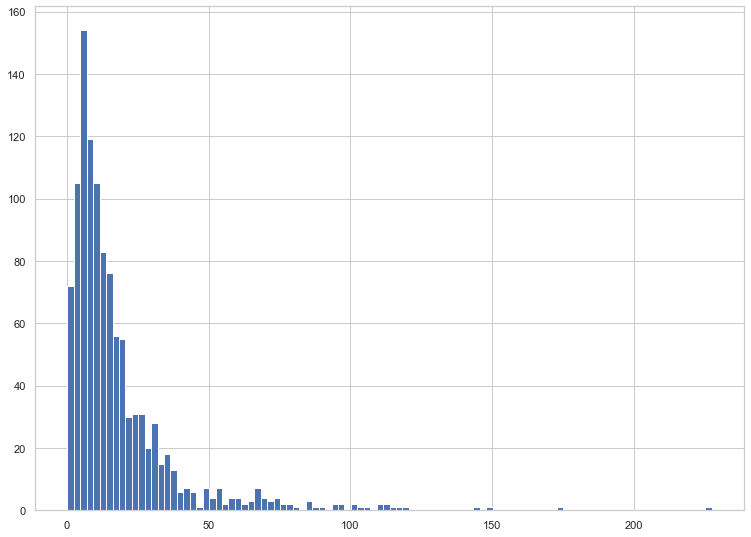

In [25]:

predictions.distance.hist(bins=100)
